In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Open the trips.csv file
trips = pd.read_csv("C:/Users/kemal/Desktop/bss real/Data2019/trips2019.csv", index_col=0)

C:\Users\kemal\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
trips.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,member_type
0,230,01/01/2019 00:04,01/01/2019 00:08,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,Member
1,1549,01/01/2019 00:06,01/01/2019 00:32,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,Casual
2,177,01/01/2019 00:08,01/01/2019 00:11,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,Casual
3,228,01/01/2019 00:08,01/01/2019 00:12,31281,8th & O St NW,31280,11th & S St NW,Member
4,1300,01/01/2019 00:12,01/01/2019 00:34,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,Member


In [4]:
# Change type of start_time and end_date to datetime
trips = trips.astype({"start_date": "datetime64"})
trips = trips.astype({"end_date": "datetime64"})

In [5]:
# Check the types of the trips dataframe
trips.dtypes

duration                         int64
start_date              datetime64[ns]
end_date                datetime64[ns]
start_station_number             int64
start_station                   object
end_station_number               int64
end_station                     object
member_type                     object
dtype: object

In [6]:
# Select the data specific to the bike station number 31245
trips_31245 = trips[trips['start_station_number']==31245] 

In [7]:
# Check the head of trips_31245
trips_31245.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,member_type
86,240,2019-01-01 01:16:00,2019-01-01 01:20:00,31245,7th & R St NW / Shaw Library,31503,Florida Ave & R St NW,Member
110,442,2019-01-01 01:28:00,2019-01-01 01:35:00,31245,7th & R St NW / Shaw Library,31600,5th & K St NW,Member
242,397,2019-01-01 02:39:00,2019-01-01 02:45:00,31245,7th & R St NW / Shaw Library,31266,11th & M St NW,Member
289,315,2019-01-01 03:41:00,2019-01-01 03:46:00,31245,7th & R St NW / Shaw Library,31111,10th & U St NW,Member
364,750,2019-01-01 07:02:00,2019-01-01 07:14:00,31245,7th & R St NW / Shaw Library,31255,24th & N St NW,Member


In [8]:
# Create new columns with the day of the week and the hour of the day using start_date.
trips["start_day"] = trips["start_date"].dt.weekday_name

In [9]:
trips["start_hour"] = trips["start_date"].dt.hour

In [10]:
# Check the head of trips
trips.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,member_type,start_day,start_hour
0,230,2019-01-01 00:04:00,2019-01-01 00:08:00,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,Member,Tuesday,0
1,1549,2019-01-01 00:06:00,2019-01-01 00:32:00,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,Casual,Tuesday,0
2,177,2019-01-01 00:08:00,2019-01-01 00:11:00,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,Casual,Tuesday,0
3,228,2019-01-01 00:08:00,2019-01-01 00:12:00,31281,8th & O St NW,31280,11th & S St NW,Member,Tuesday,0
4,1300,2019-01-01 00:12:00,2019-01-01 00:34:00,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,Member,Tuesday,0


In [11]:
# Group by start_hour and start_day and count the number of trips
trips_day_count = trips.groupby(["start_hour","start_day"]).count()

In [12]:
# Check trips_day head
trips_day_count.head()

duration  start_date  end_date  start_station_number  \
start_hour start_day                                                         
0          Friday         4105        4105      4105                  4105   
           Monday         2905        2905      2905                  2905   
           Saturday       6035        6035      6035                  6035   
           Sunday         6259        6259      6259                  6259   
           Thursday       2856        2856      2856                  2856   

                      start_station  end_station_number  end_station  \
start_hour start_day                                                   
0          Friday              4105                4105         4105   
           Monday              2905                2905         2905   
           Saturday            6035                6035         6035   
           Sunday              6259                6259         6259   
           Thursday            2856                2856         2856   

                      member_type  
start_hour start_day               
0          Friday            4105  
           Monday            2905  
           Saturday          6035  
           Sunday            6259  
           Thursday          2856

In [13]:
# Select the data specific to the bike station number 31245
trips_31245 = trips[trips['start_station_number']==31245] 

In [14]:
# Check the head of trips_31245
trips_31245.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,member_type,start_day,start_hour
86,240,2019-01-01 01:16:00,2019-01-01 01:20:00,31245,7th & R St NW / Shaw Library,31503,Florida Ave & R St NW,Member,Tuesday,1
110,442,2019-01-01 01:28:00,2019-01-01 01:35:00,31245,7th & R St NW / Shaw Library,31600,5th & K St NW,Member,Tuesday,1
242,397,2019-01-01 02:39:00,2019-01-01 02:45:00,31245,7th & R St NW / Shaw Library,31266,11th & M St NW,Member,Tuesday,2
289,315,2019-01-01 03:41:00,2019-01-01 03:46:00,31245,7th & R St NW / Shaw Library,31111,10th & U St NW,Member,Tuesday,3
364,750,2019-01-01 07:02:00,2019-01-01 07:14:00,31245,7th & R St NW / Shaw Library,31255,24th & N St NW,Member,Tuesday,7


In [26]:
# Select the only rows that are interesting for the analysis 
trips = trips[["duration", "start_date", "start_station_number", "start_day"]]

In [28]:
# Convert the start_date column to a new column with the date and the hour (without minutes and second) as the prediction of use
# will be done by hour
trips["start_date_hour"] = trips["start_date"].apply(lambda x: x.strftime("%Y-%m-%d %H:00"))

In [29]:
trips.head()

,duration,start_date,start_station_number,start_day,start_date_hour
0,230,2019-01-01 00:04:00,31203,Tuesday,2019-01-01 00:00
1,1549,2019-01-01 00:06:00,31321,Tuesday,2019-01-01 00:00
2,177,2019-01-01 00:08:00,31104,Tuesday,2019-01-01 00:00
3,228,2019-01-01 00:08:00,31281,Tuesday,2019-01-01 00:00
4,1300,2019-01-01 00:12:00,31014,Tuesday,2019-01-01 00:00


In [30]:
# Change type of start_date_hour to datetime as it is a string.
trips = trips.astype({"start_date_hour": "datetime64"})

In [31]:
# Check the types of the dataframe
trips.dtypes

duration                         int64
start_date              datetime64[ns]
start_station_number             int64
start_day                       object
start_date_hour         datetime64[ns]
dtype: object

In [32]:
# Remove start_date column as we don't need it anymore
trips = trips.drop(columns=['start_date'])

In [33]:
# Group by start_date_hour and count the number of trips
trips = trips.groupby(["start_date_hour"]).count()

In [34]:
trips.head()

,duration,start_station_number,start_day
start_date_hour,,,
2019-01-01 00:00:00,60,60,60
2019-01-01 01:00:00,107,107,107
2019-01-01 02:00:00,102,102,102
2019-01-01 03:00:00,25,25,25
2019-01-01 04:00:00,14,14,14


In [35]:
trips.shape

(8747, 3)

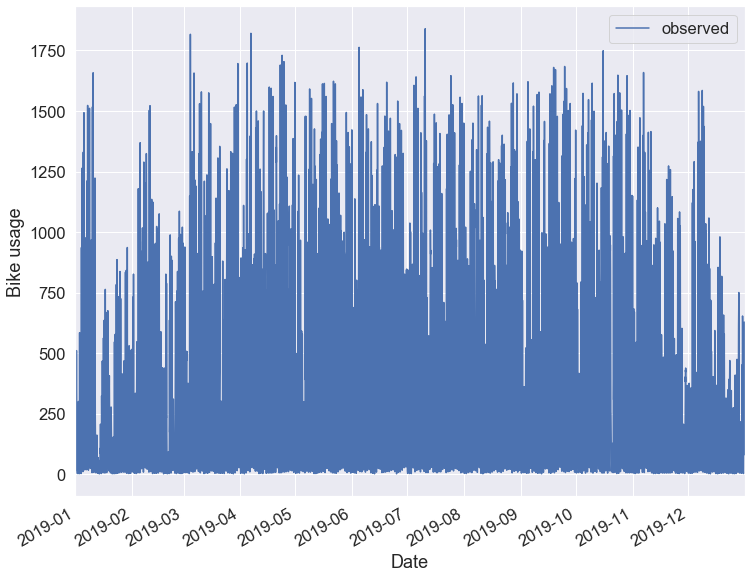

In [41]:
# Plot cnt (number of bike rides) as a function of the date
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale=1.5)
ax = trips["duration"].iloc[-12000:].plot(label='observed')
ax.set_xlabel('Date')
ax.set_ylabel('Bike usage')
plt.legend()

plt.show()

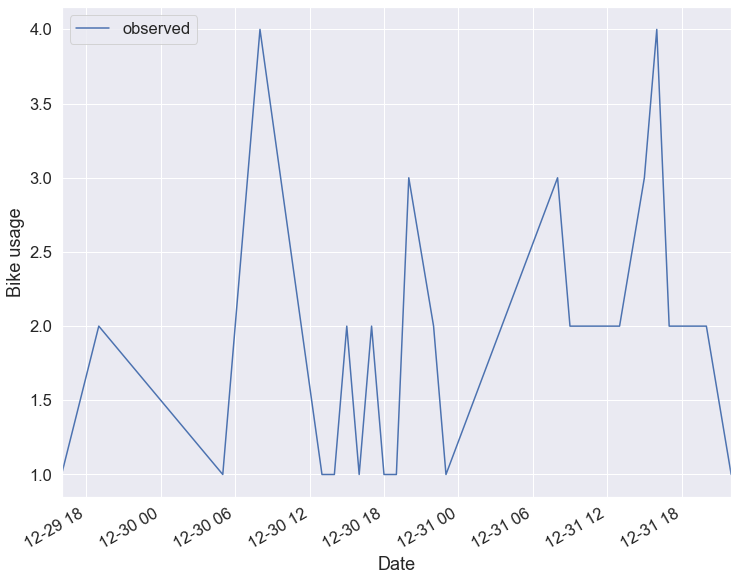

In [25]:
# Plot cnt (number of bike rides) as a function of the date
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale=1.5)
ax = trips_31245["duration"].iloc[-24:].plot(label='observed')
ax.set_xlabel('Date')
ax.set_ylabel('Bike usage')
plt.legend()

plt.show()